In [1]:
from pathlib import Path
from matplotlib import gridspec
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime

#own modules
from evaluation.utils import db
from evaluation.visualization import plot
con = db.connect()
'done'

from matplotlib.offsetbox import AnchoredOffsetbox, TextArea, HPacker, VPacker

        

<IPython.core.display.Javascript object>

Link selected experiments to publication:  HTE02_Database
 For table exp_sfc : inserted new experiments = 1 , skipped existing experiments = 0 
Read data from "data_ec_analysis" ...
SELECT * FROM data_ec_analysis WHERE (`id_exp_sfc`) IN (7475) AND cycle IN (2);
Done in  0:00:00.055307
 File  20230918_system_overview_CV.svg  already exists 


KeyboardInterrupt: Interrupted by user

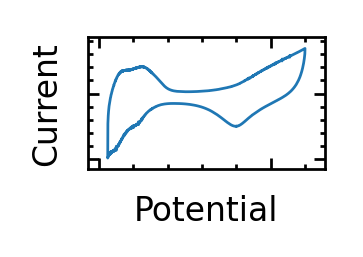

In [2]:
name='20230918_system_overview_CV'
exp_ec = db.get_exp('''SELECT  *
                        FROM hte_data.exp_ec_expanded 
                        WHERE name_user="n.roettcher"
                            AND name_setup_sfc = "SFC_1"
                            AND DATE(t_start__timestamp) = "2023-10-06"
                            AND fe_top_id_pump_out_device = 'SFC'  # not connected to ICP-MS
                            AND fe_top_pump_rate_out__rpm = 0  # no electrolyte flow
                            AND ec_name_technique="exp_ec_cv"
                            AND ROUND(cv_E_apex1__VvsRE + ec_E_RE__VvsRHE, 1) = 1.2
                             AND cv_scanrate__mV_s = 50
                         ''')



data_ec = exp_ec.dataset.get_data(con, 'data_ec_analysis', add_cond = 'cycle IN (2)')

with plt.rc_context(plot.get_style(style='singleColumn',
                                   fig_size={'width':3*1, 'height':2*1},
                                   add_margins_and_figsize= {'left': -0.6,  'bottom': -0.4,},
                                  )):
    plot_storage=plot.PlotDataStorage(name, overwrite_existing=True)
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.xaxis.set_tick_params(which='both', labelbottom=False)
    ax1.yaxis.set_tick_params(which='both', labelleft=False)
    
    color_raw = 'tab:grey'
    color_normalized = 'tab:blue'
    
    exp_ec = exp_ec.dataset\
                    .plot(x_col='E_WE_raw__VvsRHE',
                         y_col='I__A',
                         data=data_ec,
                              ax=ax1,
                          label='normalized data',
                          color='tab:blue'
                        )\
                    .return_dataset()

    ax1.set_ylabel('Current')
    ax1.set_xlabel('Potential')
    
    ax1.yaxis.set_major_locator(plt.MaxNLocator(2))
    ax1.margins(0.1, 0.1)
    plot_storage.export(fig)
    
    plt.show()

    #exp_ec_cycles.dataset.display(only_different_cols=True)
